In [150]:
import pandas as pd
import numpy as np

In [151]:
trek_data = pd.read_csv("../Data/trekkers_df_with_bias.csv")
# drop data where Email-ID is duplicated
trek_data = trek_data.drop_duplicates(subset = "Email-ID")
# reset index
trek_data = trek_data.reset_index(drop = True)
trek_data["trekker_id"] = trek_data.index
# split data into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(trek_data, test_size = 0.2, random_state = 42)
trek_data = train
# drop nan rows
trek_data = trek_data.dropna()
trek_data

,Email-ID,Name,Height,Weight,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek,trekker_id
6425,hartwig92@hess.com,Hansgeorg Wilms,174,57,18,Male,Pune,Pimpri,['Marathi' 'English'],PCCOE,Unemployed,Y,['Friday' 'Sunday' 'Saturday' 'Wednesday' 'Mon...,2,Easy,6425
5841,valeriazimmer@hotmail.de,Kevin Warmer,143,65,36,Male,Kolhapur,D Ward,['Hindi'],PCCOE,Working,Y,['Sunday' 'Saturday' 'Friday' 'Thursday'],7,Easy,5841
91640,norbertrust@hotmail.de,Valentina Pieper,165,77,29,Male,Kolhapur,Kagal,['Marathi'],PCCOE,Student,Y,['Monday' 'Tuesday'],2,Medium,91640
35752,charlottedavids@yahoo.de,Prof. Ingelore Mude,162,60,26,Male,Kolhapur,Kagal,['Hindi' 'Marathi'],MIT-ADT,Student,Y,['Friday' 'Wednesday' 'Sunday' 'Monday' 'Tuesd...,6,Easy,35752
69789,kbruder@hotmail.de,Hansgeorg Vollbrecht,143,52,27,Female,Pune,Shivaji Nagar,['English' 'Marathi'],SPPU,Student,N,['Thursday' 'Wednesday' 'Friday' 'Saturday' 'S...,0,Medium,69789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,brunhilde13@ullrich.net,Friedhold Scholl,165,79,29,Male,Nagpur,Kalameshwar,['Marathi' 'Hindi' 'Gujarati'],SPPU,Student,Y,['Saturday'],3,Medium,6265
54886,sjungfer@pruschke.com,Michel Scheel B.Eng.,164,58,32,Male,Mumbai,Andheri,['English' 'Hindi'],PCCOE,Unemployed,Y,['Sunday' 'Wednesday' 'Monday' 'Tuesday' 'Satu...,5,Medium,54886
76820,lianeschlosser@web.de,Irmela Rädel,143,74,25,Female,Pune,Pimpri,['English'],SPPU,Student,Y,['Sunday' 'Friday' 'Saturday' 'Monday' 'Thursd...,5,Hard,76820
860,sylviowulff@kruschwitz.de,Marie-Louise Reinhardt,155,67,32,Female,Pune,Pimpri,['Marathi'],MIT-ADT,Working,Y,['Friday' 'Sunday' 'Saturday' 'Thursday'],6,Easy,860


In [152]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# for categorical_data in ["Gender","City","Locality","Have you gone Trekking","Profession","college"]:
#     # use multi-label binarizer to convert categorical data to binary
#     mlb = MultiLabelBinarizer()
#     mlb.fit(trek_data[categorical_data])
#     # transform the data
#     transformed_data = mlb.transform(trek_data[categorical_data])
#     # create a dataframe from the transformed data
#     transformed_df = pd.DataFrame(transformed_data, columns = mlb.classes_)
#     # add the transformed data to the original dataframe
#     trek_data = pd.concat([trek_data, transformed_df], axis = 1)
#     # drop the original categorical data
#     trek_data = trek_data.drop(categorical_data, axis = 1)

# trek_data

In [153]:
# use pd.get_dummies to convert categorical data to binary
trek_data = pd.get_dummies(trek_data, columns = ["Gender","City","Locality","Have you gone Trekking","Profession","college"])
trek_data

,Email-ID,Name,Height,Weight,Age,Languages,Preferred Days,Number of Treks,Difficulty of Trek,trekker_id,...,Have you gone Trekking_Y,Profession_Student,Profession_Unemployed,Profession_Working,college_MIT-ADT,college_MIT-WPU,college_PCCOE,college_PICT,college_SPPU,college_VIT
6425,hartwig92@hess.com,Hansgeorg Wilms,174,57,18,['Marathi' 'English'],['Friday' 'Sunday' 'Saturday' 'Wednesday' 'Mon...,2,Easy,6425,...,1,0,1,0,0,0,1,0,0,0
5841,valeriazimmer@hotmail.de,Kevin Warmer,143,65,36,['Hindi'],['Sunday' 'Saturday' 'Friday' 'Thursday'],7,Easy,5841,...,1,0,0,1,0,0,1,0,0,0
91640,norbertrust@hotmail.de,Valentina Pieper,165,77,29,['Marathi'],['Monday' 'Tuesday'],2,Medium,91640,...,1,1,0,0,0,0,1,0,0,0
35752,charlottedavids@yahoo.de,Prof. Ingelore Mude,162,60,26,['Hindi' 'Marathi'],['Friday' 'Wednesday' 'Sunday' 'Monday' 'Tuesd...,6,Easy,35752,...,1,1,0,0,1,0,0,0,0,0
69789,kbruder@hotmail.de,Hansgeorg Vollbrecht,143,52,27,['English' 'Marathi'],['Thursday' 'Wednesday' 'Friday' 'Saturday' 'S...,0,Medium,69789,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,brunhilde13@ullrich.net,Friedhold Scholl,165,79,29,['Marathi' 'Hindi' 'Gujarati'],['Saturday'],3,Medium,6265,...,1,1,0,0,0,0,0,0,1,0
54886,sjungfer@pruschke.com,Michel Scheel B.Eng.,164,58,32,['English' 'Hindi'],['Sunday' 'Wednesday' 'Monday' 'Tuesday' 'Satu...,5,Medium,54886,...,1,0,1,0,0,0,1,0,0,0
76820,lianeschlosser@web.de,Irmela Rädel,143,74,25,['English'],['Sunday' 'Friday' 'Saturday' 'Monday' 'Thursd...,5,Hard,76820,...,1,1,0,0,0,0,0,0,1,0
860,sylviowulff@kruschwitz.de,Marie-Louise Reinhardt,155,67,32,['Marathi'],['Friday' 'Sunday' 'Saturday' 'Thursday'],6,Easy,860,...,1,0,0,1,1,0,0,0,0,0


In [154]:
# for difficulty level, we need to convert the data to numeric
trek_data["Difficulty of Trek"] = trek_data["Difficulty of Trek"].replace({"Easy":1,"Medium":2,"Hard":3})

In [155]:
trek_data.head()

,Email-ID,Name,Height,Weight,Age,Languages,Preferred Days,Number of Treks,Difficulty of Trek,trekker_id,...,Have you gone Trekking_Y,Profession_Student,Profession_Unemployed,Profession_Working,college_MIT-ADT,college_MIT-WPU,college_PCCOE,college_PICT,college_SPPU,college_VIT
6425,hartwig92@hess.com,Hansgeorg Wilms,174,57,18,['Marathi' 'English'],['Friday' 'Sunday' 'Saturday' 'Wednesday' 'Mon...,2,1,6425,...,1,0,1,0,0,0,1,0,0,0
5841,valeriazimmer@hotmail.de,Kevin Warmer,143,65,36,['Hindi'],['Sunday' 'Saturday' 'Friday' 'Thursday'],7,1,5841,...,1,0,0,1,0,0,1,0,0,0
91640,norbertrust@hotmail.de,Valentina Pieper,165,77,29,['Marathi'],['Monday' 'Tuesday'],2,2,91640,...,1,1,0,0,0,0,1,0,0,0
35752,charlottedavids@yahoo.de,Prof. Ingelore Mude,162,60,26,['Hindi' 'Marathi'],['Friday' 'Wednesday' 'Sunday' 'Monday' 'Tuesd...,6,1,35752,...,1,1,0,0,1,0,0,0,0,0
69789,kbruder@hotmail.de,Hansgeorg Vollbrecht,143,52,27,['English' 'Marathi'],['Thursday' 'Wednesday' 'Friday' 'Saturday' 'S...,0,2,69789,...,0,1,0,0,0,0,0,0,1,0


In [156]:
# Languages column is of type object
# convert it to a list
# remove [ and ] from the string
# split the string by comma

# replace ' with empty string
trek_data["Languages"] = trek_data["Languages"].str.replace("'","")
trek_data["Preferred Days"] = trek_data["Preferred Days"].str.replace("'","")

trek_data["Languages"] = trek_data["Languages"].apply(lambda x: (x[1:-1].split()))
trek_data["Preferred Days"] = trek_data["Preferred Days"].apply(lambda x: (x[1:-1].split()))

In [157]:
# dictionary of multipliers

multipliers = {
    "Age": 3,
    "Gender" : 2.5,
    "City" : 5,
    "Locality" : 1.5,
    "Have you gone Trekking" : 6,
    "Profession" : 1.5,
    "college" : 2.5,
    "Difficulty of Trek" : 5,
    "Languages" : 5,
    "Preferred Days" : 5,
    "BMI" : 1.25,
}

In [158]:
# apply multi-label binarizer for languages and preferred days



# fit the data
mlb.fit(trek_data["Languages"])


# transform the data
languages = mlb.transform(trek_data["Languages"])

# apply the multiplier
languages = languages * multipliers["Languages"]

# use same index as original dataframe
languages = pd.DataFrame(languages, index = trek_data.index)

# drop the column "Other" if it exists
if "Other" in languages.columns:
    languages = languages.drop("Other",axis = 1)

languages

,0,1,2,3
6425,5,0,0,5
5841,0,0,5,0
91640,0,0,0,5
35752,0,0,5,5
69789,5,0,0,5
...,...,...,...,...
6265,0,5,5,5
54886,5,0,5,0
76820,5,0,0,0
860,0,0,0,5


In [159]:
# apply multi-label binarizer for preferred days
# fit the data
mlb.fit(trek_data["Preferred Days"])

# transform the data
preferred_days = mlb.transform(trek_data["Preferred Days"])

# apply the multiplier
preferred_days = preferred_days * multipliers["Preferred Days"]

# convert the array to a dataframe
preferred_days = pd.DataFrame(preferred_days,columns = mlb.classes_)
# drop the column "Other" if it exists
if "Other" in preferred_days.columns:
    preferred_days = preferred_days.drop("Other",axis = 1)

# use same index as original dataframe
preferred_days = preferred_days.set_index(trek_data.index)

preferred_days

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
6425,5,5,5,5,5,0,5
5841,5,0,5,5,5,0,0
91640,0,5,0,0,0,5,0
35752,5,5,0,5,0,5,5
69789,5,5,5,5,5,0,5
...,...,...,...,...,...,...,...
6265,0,0,5,0,0,0,0
54886,0,5,5,5,0,5,5
76820,5,5,5,5,5,0,0
860,5,0,5,5,5,0,0


In [160]:
# merge the dataframes
trek_data = pd.concat([trek_data,languages,preferred_days],axis = 1)

# drop the columns Languages and Preferred Days
trek_data = trek_data.drop(["Languages","Preferred Days"],axis = 1)

trek_data

,Email-ID,Name,Height,Weight,Age,Number of Treks,Difficulty of Trek,trekker_id,Gender_Female,Gender_Male,...,1,2,3,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
6425,hartwig92@hess.com,Hansgeorg Wilms,174,57,18,2,1,6425,0,1,...,0,0,5,5,5,5,5,5,0,5
5841,valeriazimmer@hotmail.de,Kevin Warmer,143,65,36,7,1,5841,0,1,...,0,5,0,5,0,5,5,5,0,0
91640,norbertrust@hotmail.de,Valentina Pieper,165,77,29,2,2,91640,0,1,...,0,0,5,0,5,0,0,0,5,0
35752,charlottedavids@yahoo.de,Prof. Ingelore Mude,162,60,26,6,1,35752,0,1,...,0,5,5,5,5,0,5,0,5,5
69789,kbruder@hotmail.de,Hansgeorg Vollbrecht,143,52,27,0,2,69789,1,0,...,0,0,5,5,5,5,5,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,brunhilde13@ullrich.net,Friedhold Scholl,165,79,29,3,2,6265,0,1,...,5,5,5,0,0,5,0,0,0,0
54886,sjungfer@pruschke.com,Michel Scheel B.Eng.,164,58,32,5,2,54886,0,1,...,0,5,0,0,5,5,5,0,5,5
76820,lianeschlosser@web.de,Irmela Rädel,143,74,25,5,3,76820,1,0,...,0,0,0,5,5,5,5,5,0,0
860,sylviowulff@kruschwitz.de,Marie-Louise Reinhardt,155,67,32,6,1,860,1,0,...,0,0,5,5,0,5,5,5,0,0


In [161]:
trek_data

,Email-ID,Name,Height,Weight,Age,Number of Treks,Difficulty of Trek,trekker_id,Gender_Female,Gender_Male,...,1,2,3,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
6425,hartwig92@hess.com,Hansgeorg Wilms,174,57,18,2,1,6425,0,1,...,0,0,5,5,5,5,5,5,0,5
5841,valeriazimmer@hotmail.de,Kevin Warmer,143,65,36,7,1,5841,0,1,...,0,5,0,5,0,5,5,5,0,0
91640,norbertrust@hotmail.de,Valentina Pieper,165,77,29,2,2,91640,0,1,...,0,0,5,0,5,0,0,0,5,0
35752,charlottedavids@yahoo.de,Prof. Ingelore Mude,162,60,26,6,1,35752,0,1,...,0,5,5,5,5,0,5,0,5,5
69789,kbruder@hotmail.de,Hansgeorg Vollbrecht,143,52,27,0,2,69789,1,0,...,0,0,5,5,5,5,5,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,brunhilde13@ullrich.net,Friedhold Scholl,165,79,29,3,2,6265,0,1,...,5,5,5,0,0,5,0,0,0,0
54886,sjungfer@pruschke.com,Michel Scheel B.Eng.,164,58,32,5,2,54886,0,1,...,0,5,0,0,5,5,5,0,5,5
76820,lianeschlosser@web.de,Irmela Rädel,143,74,25,5,3,76820,1,0,...,0,0,0,5,5,5,5,5,0,0
860,sylviowulff@kruschwitz.de,Marie-Louise Reinhardt,155,67,32,6,1,860,1,0,...,0,0,5,5,0,5,5,5,0,0


In [162]:
# create BMI column
trek_data["BMI"] = trek_data["Weight"] / (trek_data["Height"] / 100) ** 2

In [163]:
# drop the columns that are not required 
trek_data = trek_data.drop(columns = ["Name", "Email-ID", "Weight", "Height","trekker_id"])

In [164]:
# dictionary of multipliers

multipliers = {
    "Age": 10,
    "Gender" : 3,
    "City" : 1.5,
    "Locality" : 1,
    "Have you gone Trekking" : 8,
    "Profession" : 4,
    "college" : 2,
    "Difficulty of Trek" : 2,
    "Languages" : 2,
    "Preferred Days" : 1,
    "BMI" : 4,
}

In [165]:
trek_data

,Age,Number of Treks,Difficulty of Trek,Gender_Female,Gender_Male,City_Kolhapur,City_Mumbai,City_Nagpur,City_Nashik,City_Pune,...,2,3,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BMI
6425,18,2,1,0,1,0,0,0,0,1,...,0,5,5,5,5,5,5,0,5,18.826793
5841,36,7,1,0,1,1,0,0,0,0,...,5,0,5,0,5,5,5,0,0,31.786395
91640,29,2,2,0,1,1,0,0,0,0,...,0,5,0,5,0,0,0,5,0,28.282828
35752,26,6,1,0,1,1,0,0,0,0,...,5,5,5,5,0,5,0,5,5,22.862369
69789,27,0,2,1,0,0,0,0,0,1,...,0,5,5,5,5,5,5,0,5,25.429116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,29,3,2,0,1,0,0,1,0,0,...,5,5,0,0,5,0,0,0,0,29.017447
54886,32,5,2,0,1,0,1,0,0,0,...,5,0,0,5,5,5,0,5,5,21.564545
76820,25,5,3,1,0,0,0,0,0,1,...,0,0,5,5,5,5,5,0,0,36.187589
860,32,6,1,1,0,0,0,0,0,1,...,0,5,5,0,5,5,5,0,0,27.887617


In [166]:
# apply the multipliers
for column in trek_data.columns:
    if column in multipliers:
        trek_data[column] = trek_data[column] * multipliers[column.split("_")[0]]

In [167]:
# min-max normalization
from sklearn.preprocessing import MinMaxScaler

# create a min-max scaler object
scaler = MinMaxScaler()

# fit and transform the data
trek_data[["Age", "BMI"]] = scaler.fit_transform(trek_data[["Age", "BMI"]])

trek_data

,Age,Number of Treks,Difficulty of Trek,Gender_Female,Gender_Male,City_Kolhapur,City_Mumbai,City_Nagpur,City_Nashik,City_Pune,...,2,3,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BMI
6425,0.133333,2,2,0,1,0,0,0,0,1,...,0,5,5,5,5,5,5,0,5,0.193252
5841,0.433333,7,2,0,1,1,0,0,0,0,...,5,0,5,0,5,5,5,0,0,0.444331
91640,0.316667,2,4,0,1,1,0,0,0,0,...,0,5,0,5,0,0,0,5,0,0.376453
35752,0.266667,6,2,0,1,1,0,0,0,0,...,5,5,5,5,0,5,0,5,5,0.271437
69789,0.283333,0,4,1,0,0,0,0,0,1,...,0,5,5,5,5,5,5,0,5,0.321165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.316667,3,4,0,1,0,0,1,0,0,...,5,5,0,0,5,0,0,0,0,0.390685
54886,0.366667,5,4,0,1,0,1,0,0,0,...,5,0,0,5,5,5,0,5,5,0.246293
76820,0.250000,5,6,1,0,0,0,0,0,1,...,0,0,5,5,5,5,5,0,0,0.529599
860,0.366667,6,2,1,0,0,0,0,0,1,...,0,5,5,0,5,5,5,0,0,0.368796


In [168]:
import matplotlib.pyplot as plt

/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/jx

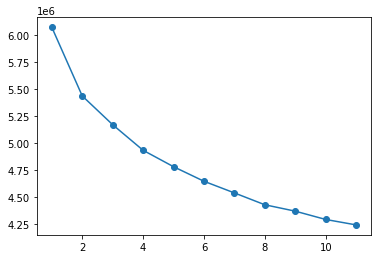

In [169]:
from sklearn.cluster import KMeans
inertias =[]
Krange = range(1,12)

for c in Krange:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(trek_data)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(Krange,inertias, marker='o')


/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/jx

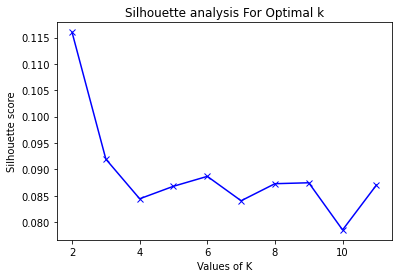

In [177]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
Krange = range(2,12)
for num_clusters in Krange:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(trek_data)
    silhouette_avg.append(silhouette_score(trek_data, kmeans.labels_))

plt.figure()
plt.plot(Krange,silhouette_avg,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

In [182]:
from sklearn.cluster import KMeans

# create a kmeans object
kmeans = KMeans(n_clusters = 4)

# fit the data
kmeans.fit(trek_data)

# get the cluster labels
labels = kmeans.predict(trek_data)

# get the cluster centroids
centroids = kmeans.cluster_centers_

# create a new column in the dataframe
trek_data["cluster"] = labels

trek_data

/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,Age,Number of Treks,Difficulty of Trek,Gender_Female,Gender_Male,City_Kolhapur,City_Mumbai,City_Nagpur,City_Nashik,City_Pune,...,3,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BMI,cluster
6425,0.133333,2,2,0,1,0,0,0,0,1,...,5,5,5,5,5,5,0,5,0.193252,0
5841,0.433333,7,2,0,1,1,0,0,0,0,...,0,5,0,5,5,5,0,0,0.444331,1
91640,0.316667,2,4,0,1,1,0,0,0,0,...,5,0,5,0,0,0,5,0,0.376453,2
35752,0.266667,6,2,0,1,1,0,0,0,0,...,5,5,5,0,5,0,5,5,0.271437,1
69789,0.283333,0,4,1,0,0,0,0,0,1,...,5,5,5,5,5,5,0,5,0.321165,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.316667,3,4,0,1,0,0,1,0,0,...,5,0,0,5,0,0,0,0,0.390685,3
54886,0.366667,5,4,0,1,0,1,0,0,0,...,0,0,5,5,5,0,5,5,0.246293,0
76820,0.250000,5,6,1,0,0,0,0,0,1,...,0,5,5,5,5,5,0,0,0.529599,0
860,0.366667,6,2,1,0,0,0,0,0,1,...,5,5,0,5,5,5,0,0,0.368796,1


In [183]:
# show random records from each cluster
trek_data.groupby("cluster").sample(5)

,Age,Number of Treks,Difficulty of Trek,Gender_Female,Gender_Male,City_Kolhapur,City_Mumbai,City_Nagpur,City_Nashik,City_Pune,...,3,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BMI,cluster
97873,0.266667,0,2,0,1,0,1,0,0,0,...,0,5,5,0,5,5,0,0,0.336750,0
41919,0.083333,2,2,1,0,0,0,0,1,0,...,5,0,5,5,5,5,5,5,0.399566,0
48965,0.516667,5,6,1,0,0,0,0,1,0,...,5,5,5,5,5,5,0,5,0.391290,0
14844,0.333333,8,6,1,0,0,0,0,0,1,...,0,5,5,5,5,0,5,5,0.580322,0
1597,0.216667,3,6,0,1,0,0,1,0,0,...,5,5,0,5,5,5,0,5,0.221430,0
70946,0.633333,1,6,1,0,0,0,1,0,0,...,5,0,5,0,5,0,5,5,0.465690,1
22569,0.533333,0,2,0,1,0,0,0,0,1,...,0,5,0,5,5,5,5,5,0.623321,1
49881,0.116667,0,2,1,0,0,0,1,0,0,...,5,5,5,5,5,0,0,0,0.375952,1
36822,0.166667,5,4,0,1,0,0,0,1,0,...,0,0,5,5,5,0,0,5,0.284430,1
77597,0.366667,2,2,1,0,0,0,0,1,0,...,5,0,0,5,5,0,5,5,0.372607,1


In [184]:
# show details of the clusters
trek_data.groupby("cluster").describe()

Age                                                         \
           count      mean       std  min       25%       50%       75%   
cluster                                                                   
0        23618.0  0.330527  0.155775  0.0  0.216667  0.316667  0.433333   
1        18900.0  0.332159  0.156063  0.0  0.216667  0.333333  0.433333   
2        18497.0  0.332289  0.155622  0.0  0.216667  0.333333  0.433333   
3        18113.0  0.331844  0.155782  0.0  0.216667  0.333333  0.433333   

                  Number of Treks            ... Wednesday           BMI  \
              max           count      mean  ...       75%  max    count   
cluster                                      ...                           
0        0.983333         23618.0  2.213989  ...       5.0  5.0  23618.0   
1        0.983333         18900.0  2.211005  ...       5.0  5.0  18900.0   
2        0.966667         18497.0  2.246851  ...       0.0  5.0  18497.0   
3        1.000000         18113.0  2.212389  ...       0.0  5.0  18113.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0        0.363237  0.102735  0.034873  0.291905  0.355118  0.426371  0.865776  
1        0.364858  0.104229  0.017701  0.292010  0.357478  0.426464  0.932432  
2        0.364155  0.102392  0.000000  0.292295  0.357058  0.426441  0.864313  
3        0.364314  0.104323  0.032575  0.291064  0.355809  0.426464  1.000000  

[4 rows x 464 columns]

In [185]:
og_data = pd.read_csv("../Data/trekkers_df_with_bias.csv")
# drop data where Email-ID is duplicated
og_data = og_data.drop_duplicates(subset = "Email-ID")
# reset index
og_data = og_data.reset_index(drop = True)
og_data["trekker_id"] = og_data.index
# split languages and preferred days
og_data["Languages"] = og_data["Languages"].str.replace("'","")
og_data["Preferred Days"] = og_data["Preferred Days"].str.replace("'","")

og_data["Languages"] = og_data["Languages"].apply(lambda x: (x[1:-1].split()))
og_data["Preferred Days"] = og_data["Preferred Days"].apply(lambda x: (x[1:-1].split()))

og_data

,Email-ID,Name,Height,Weight,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek,trekker_id
0,hschottin@gmx.de,Herr Hagen Hofmann,146,66,14,Male,Kolhapur,Tarabai Park,[Hindi],PICT,Working,Y,"[Thursday, Saturday, Friday, Monday, Sunday]",4,Medium,0
1,hkambs@trupp.de,Ing. Karl-Wilhelm Fritsch MBA.,163,73,24,Male,Nagpur,Reshim Bagh,"[Marathi, Hindi]",SPPU,Working,Y,"[Saturday, Friday]",4,Medium,1
2,xvogt@peukert.com,Bernward Gunpf,170,69,32,Female,Pune,Nal Stop,"[Marathi, Hindi, English]",MIT-WPU,Unemployed,N,"[Sunday, Saturday, Wednesday, Monday]",0,Hard,2
3,aumannfranz-xaver@aol.de,Hartmuth Steckel,168,61,36,Male,Pune,Aundh,"[Hindi, Marathi]",SPPU,Student,Y,"[Tuesday, Sunday]",3,Hard,3
4,hans-h84@kaul.org,Ricarda Hermann,161,59,38,Female,Mumbai,Andheri,"[English, Marathi]",SPPU,Student,Y,"[Wednesday, Sunday]",4,Hard,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98905,ukaester@binner.de,Prof. Hans-Georg Benthin MBA.,149,54,34,Female,Pune,Pimpri,"[English, Marathi, Hindi]",SPPU,Unemployed,N,"[Friday, Sunday, Saturday]",0,Easy,98905
98906,rochusortmann@hethur.com,Vinko Schönland B.A.,141,57,44,Male,Pune,Nal Stop,[Hindi],MIT-ADT,Student,N,"[Saturday, Sunday, Friday, Thursday, Wednesday]",0,Easy,98906
98907,sevimdrubin@roehricht.com,Dipl.-Ing. Gottlob Hoffmann B.Sc.,161,69,46,Female,Nagpur,Kamptee,"[Marathi, English, Gujarati]",MIT-ADT,Unemployed,N,"[Saturday, Sunday, Monday, Wednesday]",0,Hard,98907
98908,maritawarmer@gmail.com,Miriam Sorgatz-Hövel,170,63,20,Female,Pune,Kothrud,[Hindi],VIT,Unemployed,Y,"[Thursday, Sunday]",3,Easy,98908


In [186]:
# select random indices from each cluster
indices = trek_data.groupby("cluster").apply(lambda x: x.sample(10).index)
for each in indices:
    print(og_data.loc[each].to_markdown())

|       | Email-ID                      | Name                     |   Height |   Weight |   Age | Gender   | City     | Locality      | Languages                          | college   | Profession   | Have you gone Trekking   | Preferred Days                                                       |   Number of Treks | Difficulty of Trek   |   trekker_id |
|------:|:------------------------------|:-------------------------|---------:|---------:|------:|:---------|:---------|:--------------|:-----------------------------------|:----------|:-------------|:-------------------------|:---------------------------------------------------------------------|------------------:|:---------------------|-------------:|
| 93905 | richardluebs@gmx.de           | Prof. Berndt Jopich      |      160 |       80 |    38 | Female   | Pune     | Aundh         | ['Hindi', 'Gujarati', 'English']   | MIT-WPU   | Unemployed   | N                        | ['Wednesday', 'Tuesday', 'Thursday', 'Sunday', 'Saturday',